In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

In [2]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
train_path = os.path.join('devnagri_alphabets','Train')
test_path = os.path.join('devnagri_alphabets','Test')

In [4]:
count_train,count_test = 0,0
for d in os.listdir(train_path):
    count_train += len(os.listdir(os.path.join(train_path, d)))
    count_test += len(os.listdir(os.path.join(test_path, d)))
print("Train Instance: ", count_train)
print("Test Instance: ", count_test)

Train Instance:  61201
Test Instance:  10800


In [5]:
image = cv2.imread("devnagri_alphabets/Train/character_1_ka/10969.png")
print(image.shape)

(32, 32, 3)


In [25]:
img_size = 32
batch_size = 128
epochs = 10

In [7]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [8]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_path,
                                                           shuffle=True,
                                                           target_size=(img_size,img_size))

Found 61201 images belonging to 36 classes.


In [9]:
val_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=test_path,
                                                           shuffle=True,
                                                           target_size=(img_size,img_size))

Found 10800 images belonging to 36 classes.


In [28]:
sample_training_images, _ = next(train_data_gen)

In [11]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

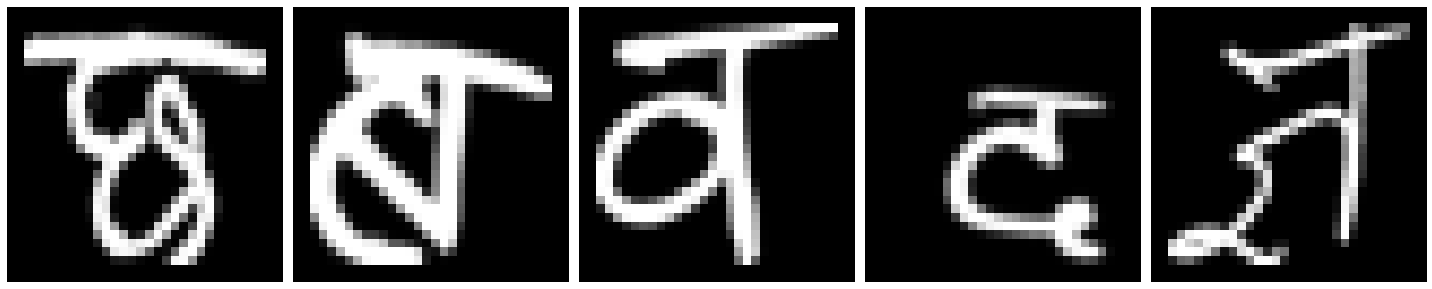

In [12]:
plotImages(sample_training_images[:5])

In [18]:
cnn_model = Sequential()
cnn_model.add(Conv2D(50,(3,3), activation='relu',input_shape=(img_size,img_size,3), name='conv2d_layer'))
cnn_model.add(MaxPooling2D((2,2)))
cnn_model.add(Conv2D(100,(3,3), activation='relu', name='conv2d_layer_2'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1200,activation='relu',name='hidden_layer'))
cnn_model.add(Dense(200,activation='relu',name='hidden_layer_2'))
cnn_model.add(Dense(36,activation='softmax',name='output'))

In [19]:
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer (Conv2D)        (None, 30, 30, 50)        1400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_layer_2 (Conv2D)      (None, 13, 13, 100)       45100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
hidden_layer (Dense)         (None, 1200)              4321200   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)              

In [30]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = cnn_model.fit_generator(
    train_data_gen, #batch_size,
    epochs=epochs,
    validation_data=val_data_gen, # batch_size
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 479 steps, validate for 85 steps
Epoch 1/10
479/479 [==============================] - 3424s 7s/step - loss: 0.5226 - accuracy: 0.8494 - val_loss: 0.1766 - val_accuracy: 0.9485
Epoch 2/10
479/479 [==============================] - 102s 214ms/step - loss: 0.1088 - accuracy: 0.9655 - val_loss: 0.0995 - val_accuracy: 0.9688
Epoch 3/10
479/479 [==============================] - 81s 170ms/step - loss: 0.0487 - accuracy: 0.9842 - val_loss: 0.1295 - val_accuracy: 0.9644
Epoch 4/10
479/479 [==============================] - 89s 185ms/step - loss: 0.0333 - accuracy: 0.9890 - val_loss: 0.0890 - val_accuracy: 0.9752
Epoch 5/10
479/479 [==============================] - 76s 158ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0991 - val_accuracy: 0.9729
Epoch 6/10
479/479 [==============================] - 77s 160ms/step - loss: 0.0254 - accuracy: 0.9920 - val_loss: 0.1008 - val_accuracy: 0.9721
Epoch 7/10
479/479 [=================

In [33]:
cnn_model.save("hindi_cnn_weights.h5")

In [39]:
new_model = keras.models.load_model("hindi_cnn_weights.h5")

In [40]:
new_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_layer (Conv2D)        (None, 30, 30, 50)        1400      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 50)        0         
_________________________________________________________________
conv2d_layer_2 (Conv2D)      (None, 13, 13, 100)       45100     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 100)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3600)              0         
_________________________________________________________________
hidden_layer (Dense)         (None, 1200)              4321200   
_________________________________________________________________
hidden_layer_2 (Dense)       (None, 200)              